# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
import json
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [3]:
display(type(data))
data.keys()

dict

dict_keys(['meta', 'data'])

In [11]:
display(type(data['meta']))
display(data['meta'].keys())
type(data['meta']['view'])

dict

dict_keys(['view'])

dict

In [12]:
display(type(data['data']))
display(type(data['data'][0]))
display(type(data['data'][0][0]))

list

list

int

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [28]:
import pandas as pd
data['meta']['view'].keys()
columns = data['meta']['view']['columns']

column_names = [col['name'] for col in columns]
df = pd.DataFrame(data['data'], columns=column_names)
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60261,519150,1B28C1DD-B25F-457E-86E4-7D1463BE82C3,519150,1527194644,959778,1527194644,959778,None,2016,2016,...,72,DIS,DIS1_0,CRDPREV,RACE,ASN,None,None,None,None
60262,519704,4FF6ADF8-CC4B-4D94-A5B0-7766346A0D3E,519704,1527194644,959778,1527194644,959778,None,2016,2016,...,72,OVC,OVC3_1,CRDPREV,RACE,BLK,None,None,None,None
60263,519705,02896705-4A9F-45A2-A84B-923DEA6DC6A2,519705,1527194644,959778,1527194644,959778,None,2016,2016,...,72,OVC,OVC3_1,CRDPREV,RACE,AIAN,None,None,None,None
60264,519706,4DF2E74C-5043-474B-9739-98B4D8736BDB,519706,1527194644,959778,1527194644,959778,None,2016,2016,...,72,OVC,OVC3_1,CRDPREV,RACE,ASN,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [132]:
df[df['Topic'] == 'Asthma'].Question.value_counts(normalize=True)
asthma = df[df['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
asthma['StratificationCategoryID1'].value_counts()

RACE       540
GENDER     220
OVERALL    110
Name: StratificationCategoryID1, dtype: int64

In [133]:
asthma = asthma[asthma['StratificationCategoryID1'] == 'OVERALL']
asthma['DataValueTypeID'].value_counts()
asthma = asthma[asthma['DataValueTypeID'] == 'CRDPREV']
asthma = asthma[['LocationAbbr','DataValue']]
asthma = asthma.set_index(['LocationAbbr'])

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

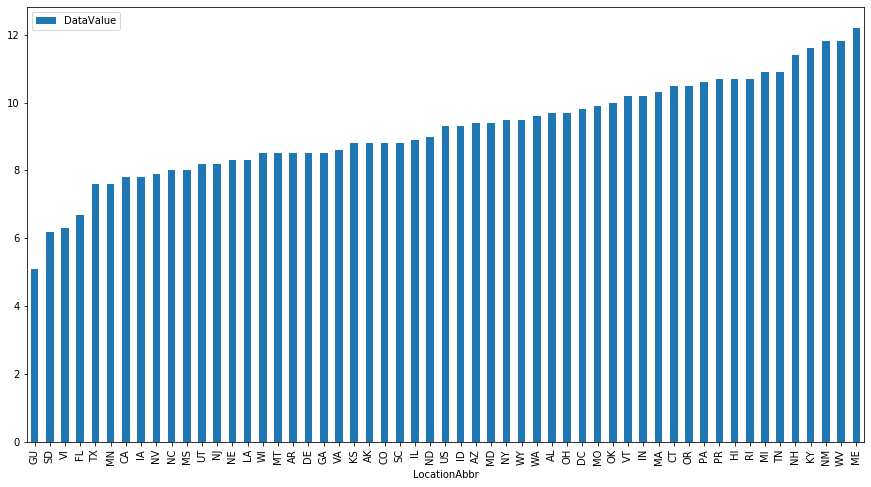

In [144]:
asthma.DataValue = asthma['DataValue'].astype('float')
asthma = asthma.sort_values(by='DataValue')
asthma.plot.bar(figsize=(15,8));

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!